# PY End Term Assignment

Created By:

Kaviya U C - D20018

Shivani Nehra - D20031

### A. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir(r'C:\Users\shiva\Desktop\Praxis\Graphs')

### B. Data Resources

#### Dataset 1: Cars Dataset
#### Data Dictionary

Github link:- https://github.com/Kaviya-U-C/PY_EndTerm/blob/main/CARS_DATA_DICTIONARY.csv


#### Dataset 2: Iris Dataset
#### Data Dictionary

Github Link :- https://github.com/Kaviya-U-C/PY_EndTerm/blob/main/IRIS_DATA_DICTIONARY.csv

### C. Importing Datasets

#### Dataset 1: Cars Dataset

In [3]:
df1= pd.read_csv("C:/Users/shiva/Desktop/Praxis/Graphs/cars.csv")

Github link to the cars dataset
https://github.com/Kaviya-U-C/PY_EndTerm/blob/main/cars.csv

#### Dataset 2: Iris Dataset

In [4]:
df2=pd.read_csv("C:/Users/shiva/Desktop/Praxis/Graphs/iris.csv")

Github link to iris dataset :- https://github.com/Kaviya-U-C/PY_EndTerm/blob/main/iris.xls

### D. Problems

#### Ques 1. 
You will create a function named ‘Histogram’ which will take the entire dataset as input and return the histograms for all the numerical variables in your dataset as .png files in your working directory. Make sure that all the generated graphs have proper titles and axis labels.

Histogram(data)
-> returns histograms for all numerical variables in data.

In [ ]:

def Histogram(data):  
    num_df=data.select_dtypes(include=[np.number]) #Separating numerical variables
    for col in num_df:
        num_df.hist( column= col,grid=False,figsize= (9,10),color= "Red",bins= 10) #Creating a histogram for each numerical column in dataset
        plt.xlabel(col, fontsize= 12) #Setting up the x-label
        plt.ylabel("Frequency", fontsize= 12) #Setting up the y-label
        plt.title("Histogram-"+col, fontsize= 16) #Setting up title
        plt.savefig(col+"Hist.png") #Saving the histogram as png image
 

In [ ]:
Histogram(df2)

#### Ques 2.
Make an improvement on the function you have created in 1. Create a function names ‘Graphs’ which will take a dataset as input and return histograms and boxplots for all the numerical variables and bar plots for all categorical variables.

In [ ]:
def Boxplot(num_df):
    for col in num_df:
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        ax = np.reshape(ax, (1, 1)) #Reshaping the axis
        sns.boxplot(x=num_df[col],color='cyan') #Plotting boxplot
        plt.title("Boxplot-"+col)#Setting up title
        plt.ylabel("Frequency") #Setting up the y axis label
        plt.savefig(col+" Box.png") #Saving the boxplot as png image
   

In [ ]:
def Barplot(cat_df):
    for col in cat_df:
        cat_freq = cat_df[col].value_counts() #Getting the frequency of occurence of values under for column
        f, ax = plt.subplots(figsize=(9, 10)) #Assigning the figsize
        plt.bar(cat_freq.index,cat_freq,align='center') #Assigning the values for x axis and y axis
        plt.xlabel(col, fontsize= 12) #Setting up y axis label
        plt.title("Bar Plot-"+col, fontsize= 16) #Setting up title
        plt.savefig(col+"Bar.png") #Saving barplot as png image
    

In [ ]:
def Graphs(data):
    
    num_df=data.select_dtypes(include=[np.number]) #Separating numerical variables
    cat_df=data.select_dtypes(exclude=[np.number]) #Separating categorical variables
    
    Boxplot(num_df) #Boxplot function call
   
    Histogram(num_df)#Histogram function call
    
    Barplot(cat_df)#Barplot function call

In [ ]:
Graphs(df1)

#### Ques 3.
Often, we are not required to plot the graphs for all the variables in our dataset. Add an additional argument to the function in 2 named ‘var’. This will take a list containing the variable index and return the graphs for only those variables. By default, (i.e. if the list of variable index is not provided), then it must return the required graphs for all the variables in data.

Example:
Graphs(data, var=c(1,3,4))
-> Will generate the graphics for only the variables 1,3 & 4 in the data.

In [ ]:
def Histogram1(num_df,a):
    num_df.hist( column= a,grid=False,figsize= (9,10), color= "Red",bins= 10 )#Plotting histogram for column in the argument
    plt.xlabel(a, fontsize= 12) #Setting up x label
    plt.ylabel("Frequency", fontsize= 12) #Setting up y label
    plt.title("Histogram-"+a, fontsize= 16) #Setting up the title
    plt.savefig(a+"Hist.png") #Saving histogram as png image

In [ ]:
def Boxplot1(num_df, a):
    
    fig, ax = plt.subplots(1, 1) #Assigning subplots
    ax = np.reshape(ax, (1, 1)) #Reshaping the axis
    sns.boxplot(x=num_df[a],color='cyan') #Plotting boxplot
    plt.title("Boxplot-"+a) #Setting up title
    plt.ylabel("Frequency") #Setting up y axis label
    plt.savefig(a+" Box.png") #Saving the boxplot as png image

In [ ]:
def Barplot1(cat_df,a):
    cat_freq = cat_df[a].value_counts()#Getting the frequency of occurence of values under for column
    f, ax = plt.subplots(figsize=(9, 10))#Assigning the figsize
    sns.barplot(x= cat_freq.index, y= cat_freq)#Assigning the values for x axis and y axis
    plt.xlabel(a, fontsize= 12)#Setting up x label
    plt.title("Bar Plot-"+a, fontsize= 16) #Setting up title
    plt.savefig(a+"Bar.png") #Saving barplot as png image
 

In [ ]:
col_al=np.arange(0,len(df2.columns)) #Getting the total numbers of column in dataset
def Graphs(data,var=col_al): #Assigning default value as all columns for var argument
   
    num_df=data.select_dtypes(include=[np.number]) #Separating numerical variables
    cat_df=data.select_dtypes(exclude=[np.number]) #Separating categorical variables      
    col_al_list = data.columns.tolist() #Creating a list of all columns 
    for i in var:
        a=col_al_list[i] #For given index in var , map it to the column in dataset
        if a in num_df:
            Boxplot1(num_df,a)#Boxplot fuction call
            Histogram1(num_df,a)#Histogram function call 
        if a in cat_df:
            Barplot1(cat_df,a)#Barplot function call


In [ ]:
Graphs(df2)

#### Ques 4.
Sometimes, we do not want to mess up our working directories with so many image files. Create
an additional argument for the function "dir" (directory), such that the function exports all the
files to that specified folder (which need not necessarily be your working directory).

Example:
Graphs(data, Variable=c(1,3,4), dir=".../Praxis/Graphs")
-> will generate all the necessary graphics for the variables 1, 3
and 4 in the specified location in your system which is ".../Praxis/
Graphs"

In [ ]:
def Histogram2(num_df,a,dir):
    #dir- argument contains the path to new directory
    num_df.hist( column= a,grid=False,figsize= (9,10), color= "Red",bins= 10 )#Plotting histogram for column in the argument
    plt.xlabel(a, fontsize= 12) #Setting up x label
    plt.ylabel("Frequency", fontsize= 12) #Setting up y label
    plt.title("Histogram-"+a, fontsize= 16) #Setting up title
    os.chdir(dir) #Changing working directory
    plt.savefig(a+"Hist.png") #Saving the histogram as png image

In [ ]:
def Boxplot2(num_df, a,dir):
    
    fig, ax = plt.subplots(1, 1)#Assigning subplots
    ax = np.reshape(ax, (1, 1))#Reshaping the axis
    sns.boxplot(x=num_df[a],color='cyan')#Plotting boxplot
    plt.title("Boxplot-"+a)#Setting up title
    plt.ylabel("Frequency")#Setting up y axis label
    os.chdir(dir)#Changing the working directory
    plt.savefig(a+" Box.png")#Saving the histogram as png image

In [ ]:
def Barplot2(cat_df,a,dir):
    cat_freq = cat_df[a].value_counts()#Getting the frequency of occurence of values under for column
    f, ax = plt.subplots(figsize=(9, 10))#Assigning the figsize
    plt.bar(cat_freq.index,cat_freq,align='center')#Assigning the values for x axis and y axis
    plt.xlabel(a, fontsize= 12)#Setting up x label
    plt.title("Bar Plot-"+a, fontsize= 16) #Setting up title
    os.chdir(dir) #Changing the working directory 
    plt.savefig(a+"Bar.png") #Saving barplot as png image

In [ ]:
col_al=np.arange(0,len(df2.columns))#Getting the total number of column in dataset
def Graphs(data,var=col_al,dir="C:/Users/shiva/Desktop/Praxis/Graphs"):
 #dir - Assigning with default argument of working directory  
    num_df=data.select_dtypes(include=[np.number]) #Seperating numerical variables
    cat_df=data.select_dtypes(exclude=[np.number]) #Seperating categorical variables      
    all_col = data.columns.tolist() #Creating a list of all columns 
    for i in var:
        a=all_col[i] #For given index in var , map it to the column in dataset
        if a in num_df:
            Boxplot2(num_df,a,dir)#Fuction call for boxplot 
            Histogram2(num_df,a,dir)#Fuction call for histogram
        if a in cat_df:
            Barplot2(cat_df,a,dir)#Fuction call for barplot
        

In [ ]:
Graphs(df2,(1,2,3),"C:/Users/shiva/Desktop/Praxis_Python/Visualizations")

In [ ]:
Graphs(df2)

#### Ques 5. 
Further Improvements: Create at least 2 more features of this function which you think can benefit you in your EDA process.

#### Features Added

Feature 1: Outlier Analysis: Boxplot Method and Winsorization

Feature 2: Bivariate Analysis: Creating and Visualizing Cross tab for Categorical Variables

Feature 3: Estimating the correlation of numerical variables in dataset

#### Feature 1 : Outlier Analysis: Boxplot Method and Winsorization

In [5]:
#Creating copy of the dataframe
df_cap1= df1.copy()
df_cap2= df1.copy()

#### A. Capping Outliers with IQR - Boxplot Method

In [6]:
def boxplot_method(data,factor=1.5):
    #factor - number to be multiplied for IQR to get lower/upper whisker
    num_df=data.select_dtypes(include=[np.number]) #Separating numerical variables
        
    for col in num_df:
        
        #Plotting Boxplot before capping the outliers
        plt.figure(figsize=(16,4))
        plt.subplot(143)
        sns.boxplot(num_df[col])
        plt.title('Before')
        plt.legend()
       
        q1= num_df[col].quantile(0.25)#Getting the value for 25th percentile or Q1
        q3= num_df[col].quantile(0.75)#Getting the value of 75th percentile or Q2
        IQR = q3-q1 #Calculating interquartile range
        
        Lower_whisker= q1-(IQR*factor) #Calculating lower whisker, any value beyond lower whisker is considered to be outlier
        Upper_whisker= q3+(IQR*factor) #Calculating upper whisker, any value beyond upper whisker is considered to be outlier
        print("The lower whisker and upper whisker of %s is %.2f,%.2f" %(col,Lower_whisker,Upper_whisker))
        no_out=np.sum(num_df[col]<Lower_whisker)+np.sum(num_df[col]>Upper_whisker)#Calculating the number of outliers 
        print("No.of outliers in %s column: %d"%(col,no_out))
        
        #Capping outliers with IQR*factor
        #Syntax: np.where(condition;if true;if false)
        #if value greater then upper whisker, replace it with upper whisker value or if it is lesser then lower whisker replce it with lower whisker value
        num_df[col]=np.where(num_df[col]>Upper_whisker,Upper_whisker,np.where(num_df[col]<Lower_whisker,Lower_whisker,num_df[col]))
        
        #Plotting Boxplot after capping the outliers
        plt.subplot(144)
        sns.boxplot(num_df[col])
        plt.title('After')
        plt.tight_layout()
        plt.show()
        

No handles with labels found to put in legend.
<ipython-input-6-205a978063b0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>Upper_whisker,Upper_whisker,np.where(num_df[col]<Lower_whisker,Lower_whisker,num_df[col]))


The lower whisker and upper whisker of MPG is 5.00,41.00
No.of outliers in MPG column: 15


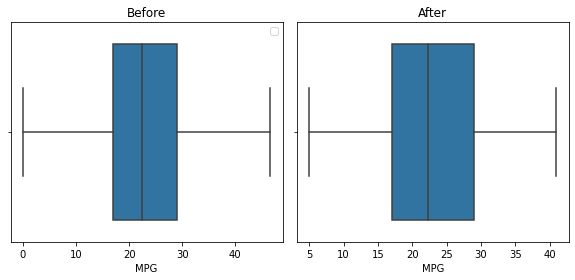

No handles with labels found to put in legend.


The lower whisker and upper whisker of Cylinders is 0.00,12.00
No.of outliers in Cylinders column: 0


<ipython-input-6-205a978063b0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>Upper_whisker,Upper_whisker,np.where(num_df[col]<Lower_whisker,Lower_whisker,num_df[col]))


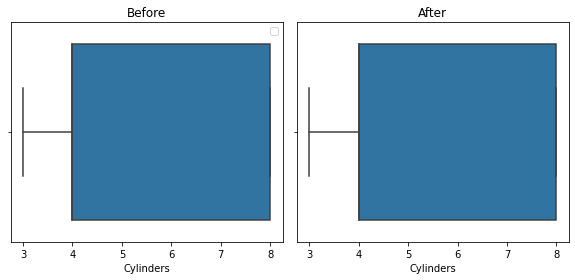

No handles with labels found to put in legend.
<ipython-input-6-205a978063b0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>Upper_whisker,Upper_whisker,np.where(num_df[col]<Lower_whisker,Lower_whisker,num_df[col]))


The lower whisker and upper whisker of Displacement is -92.00,499.00
No.of outliers in Displacement column: 0


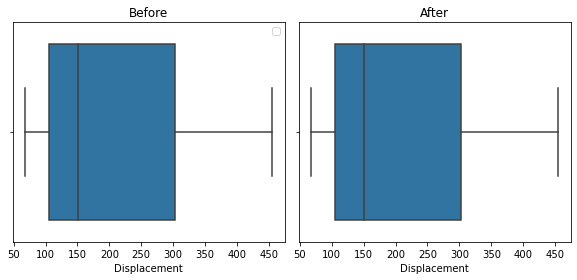

No handles with labels found to put in legend.
<ipython-input-6-205a978063b0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>Upper_whisker,Upper_whisker,np.where(num_df[col]<Lower_whisker,Lower_whisker,num_df[col]))


The lower whisker and upper whisker of Horsepower is 21.00,183.00
No.of outliers in Horsepower column: 23


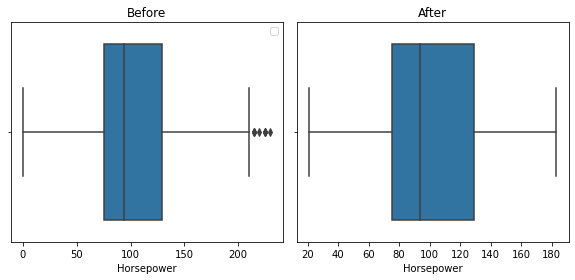

No handles with labels found to put in legend.
<ipython-input-6-205a978063b0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>Upper_whisker,Upper_whisker,np.where(num_df[col]<Lower_whisker,Lower_whisker,num_df[col]))


The lower whisker and upper whisker of Weight is 834.75,5010.00
No.of outliers in Weight column: 1


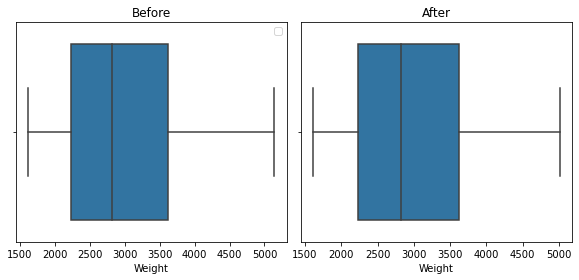

No handles with labels found to put in legend.


The lower whisker and upper whisker of Acceleration is 10.23,20.65
No.of outliers in Acceleration column: 28


<ipython-input-6-205a978063b0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>Upper_whisker,Upper_whisker,np.where(num_df[col]<Lower_whisker,Lower_whisker,num_df[col]))


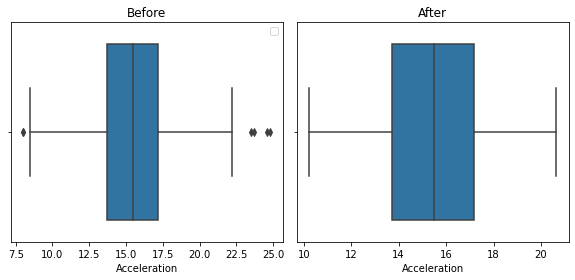

No handles with labels found to put in legend.


The lower whisker and upper whisker of Model is 67.00,85.00
No.of outliers in Model column: 0


<ipython-input-6-205a978063b0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>Upper_whisker,Upper_whisker,np.where(num_df[col]<Lower_whisker,Lower_whisker,num_df[col]))


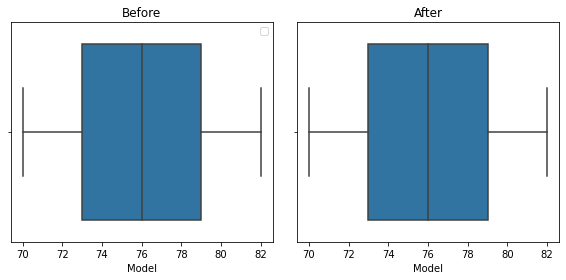

In [7]:
boxplot_method(df_cap1,1)

#### B. Capping Outliers with Percentiles - Winsorization

In [8]:
def winsorize(data, lower_limit, upper_limit): 
    #lower_limit - Percentile of value to be capped at the lower end
    #upper_limit - Percentile of value to be capped at the higher end
    
    num_df=data.select_dtypes(include=[np.number]) #Seperating the numerical variables
    
    for col in num_df:
        
        #Plotting Boxplot before capping the outliers
        plt.figure(figsize=(16,4))
        plt.subplot(143)
        sns.boxplot(num_df[col])
        plt.title('Before')
        plt.legend()
        
        lower_bound= num_df[col].quantile(lower_limit) #Getting the value of lower bound for the given percentile of lower limit
        upper_bound= num_df[col].quantile(1-upper_limit) #Getting the value of upper bound for the given percentile of upper limit
        print("The lower bound and upper bound of %s is %.2f,%.2f" %(col,lower_bound,upper_bound))
        no_out=np.sum(num_df[col]<lower_bound)+np.sum(num_df[col]>upper_bound)#Calculating the number of outliers 
        print("No.of outliers in %s column: %d"%(col,no_out))
        
        #Capping outliers with percentiles
        #Syntax: np.where(condition;if true;if false)
        #if value greater then upper whisker, replace it with upper whisker value or if it is lesser then lower whisker replce it with lower whisker value
        num_df[col]=np.where(num_df[col]>upper_bound,upper_bound,
                             np.where(num_df[col]<lower_bound,lower_bound,num_df[col]))
        
        #Plotting Boxplot after capping the outliers
        plt.subplot(144)
        sns.boxplot(num_df[col])
        plt.title('After')
        plt.tight_layout()
        plt.show()
        
    

No handles with labels found to put in legend.
<ipython-input-8-d8d631a0f6b6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>upper_bound,upper_bound,


The lower bound and upper bound of MPG is 13.50,34.25
No.of outliers in MPG column: 82


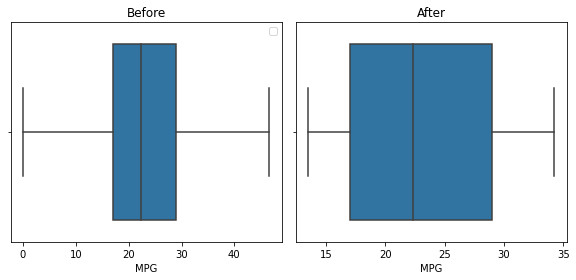

No handles with labels found to put in legend.
<ipython-input-8-d8d631a0f6b6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>upper_bound,upper_bound,


The lower bound and upper bound of Cylinders is 4.00,8.00
No.of outliers in Cylinders column: 4


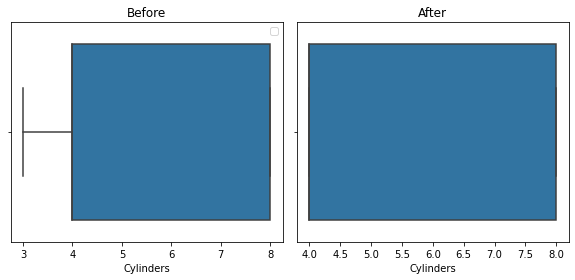

No handles with labels found to put in legend.
<ipython-input-8-d8d631a0f6b6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>upper_bound,upper_bound,


The lower bound and upper bound of Displacement is 90.00,350.00
No.of outliers in Displacement column: 76


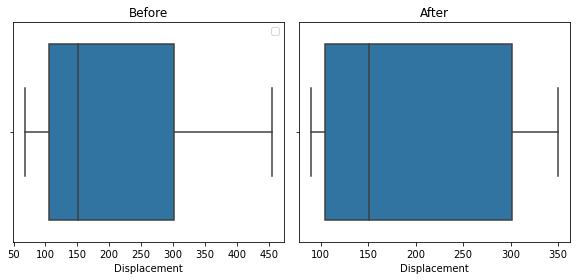

No handles with labels found to put in legend.
<ipython-input-8-d8d631a0f6b6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>upper_bound,upper_bound,


The lower bound and upper bound of Horsepower is 65.00,160.00
No.of outliers in Horsepower column: 74


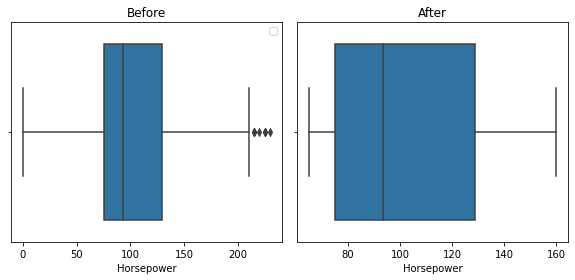

No handles with labels found to put in legend.
<ipython-input-8-d8d631a0f6b6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>upper_bound,upper_bound,


The lower bound and upper bound of Weight is 1987.50,4265.50
No.of outliers in Weight column: 82


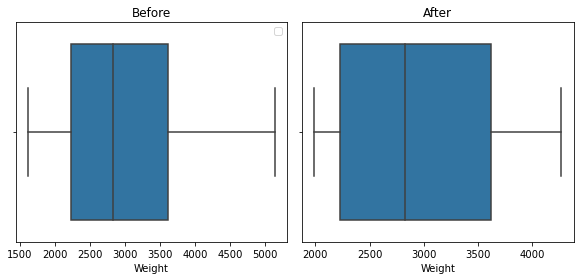

No handles with labels found to put in legend.
<ipython-input-8-d8d631a0f6b6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>upper_bound,upper_bound,


The lower bound and upper bound of Acceleration is 12.00,19.00
No.of outliers in Acceleration column: 75


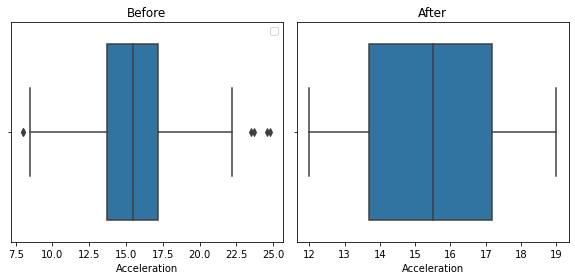

No handles with labels found to put in legend.
<ipython-input-8-d8d631a0f6b6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col]=np.where(num_df[col]>upper_bound,upper_bound,


The lower bound and upper bound of Model is 71.00,81.00
No.of outliers in Model column: 66


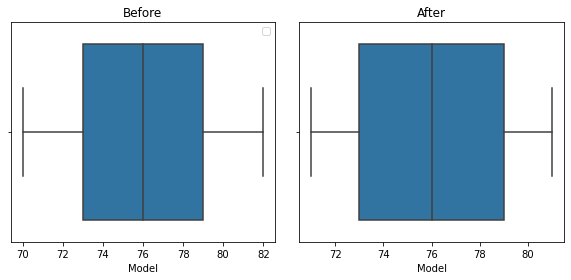

In [9]:
#Winsorizing at 0.80
winsorize(df_cap2,0.10,0.10)

#### Feature 2 : Bivariate Analysis: Creating and Visualizing Cross tab for Categorical Variables

####  Crosstab Feature 

In [10]:
def crosstab(df):
    num_df=df.select_dtypes(include=[np.number]).columns.tolist()#numerical columns as a list
    cat_df=df.select_dtypes(exclude=[np.number]).columns.tolist()#categorical columns as a list
    num_df1=df.select_dtypes(include=[np.number])
    cat_df1=df.select_dtypes(exclude=[np.number])
    print("The categorical fields in the dataset are",cat_df)#displaying categorical variables 
    a = int(input("enter the first categorical column to find the relationship: "))#user input for first categorical variable 
    b = int(input("enter the second categorical column to find the relationship: "))#user input for second categorical variable
    #calculating the crosstabs for two categorical variables
    print((pd.crosstab(cat_df1.iloc[:,a-1],cat_df1.iloc[:,b-1],normalize=False,margins=True, margins_name="Total")).round(2))
    #displaying the crosstabs as mutiple bar plot
    (pd.crosstab(cat_df1.iloc[:,a-1],cat_df1.iloc[:,b-1],normalize=False,margins=False, margins_name="Total")).round(2).plot.bar()

The categorical fields in the dataset are ['Car', 'Origin']
enter the first categorical column to find the relationship: 1
enter the second categorical column to find the relationship: 2
Origin                   Europe  Japan   US  Total
Car                                               
AMC Ambassador Brougham       0      0    1      1
AMC Ambassador DPL            0      0    1      1
AMC Ambassador SST            0      0    1      1
AMC Concord                   0      0    2      2
AMC Concord DL                0      0    1      1
...                         ...    ...  ...    ...
Volvo 244DL                   1      0    0      1
Volvo 245                     1      0    0      1
Volvo 264gl                   1      0    0      1
Volvo Diesel                  1      0    0      1
Total                        73     79  254    406

[309 rows x 4 columns]


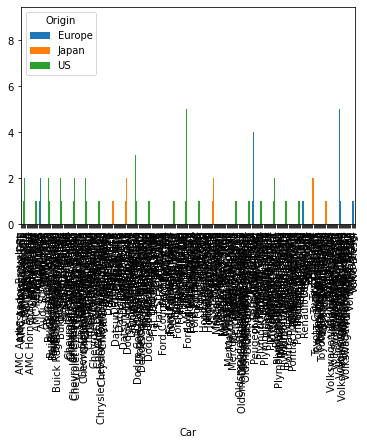

In [11]:
crosstab(df1)

Note: As the car column has 309 distinct values, we are not able to represent crosstab accurately.
Hence we are using Attrition dataset to represent the crosstabs

In [12]:
df3 = pd.read_csv("C:/Users/shiva/Downloads/attrition.csv")

The categorical fields in the dataset are ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime']
enter the first categorical column to find the relationship: 1
enter the second categorical column to find the relationship: 2
Department         Human Resources  Research & Development  Sales  Total
BusinessTravel                                                          
Non-Travel                       6                      97     47    150
Travel_Frequently               11                     182     84    277
Travel_Rarely                   46                     682    315   1043
Total                           63                     961    446   1470


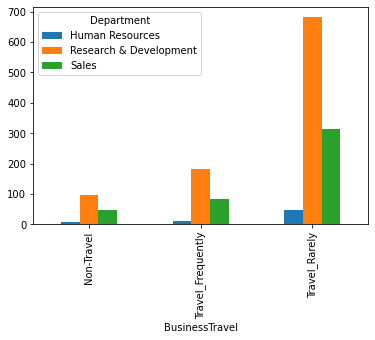

In [13]:
crosstab(df3)

#### Feature 3: Estimating the correlation of numerical variables in dataset

####  Correlation between variables

In [14]:
def correlation(df):
    num_df=df.select_dtypes(include=[np.number])#numerical fields of the dataset
    correlation_matrix = num_df.corr()#calculating the cirrelation matrix
    correlation_matrix.round(decimals = 2)#rounding the correlation matrix to 2 decimal points

    plt.figure(figsize=(10,10))
    matrix = np.triu((correlation_matrix))#returns the copy of the correlation matrix with the elements below the k-th diagonal zeroed.
    #plotting the correlation heatmap 
    sns.heatmap(correlation_matrix.round(decimals = 2),annot=True,mask = matrix,cmap="Blues", vmin=-1,vmax=1,center=0)
    print("The values in darker shade of blue specify high correlation and in lighter shades specify lower correlation")

The values in darker shade of blue specify high correlation and in lighter shades specify lower correlation


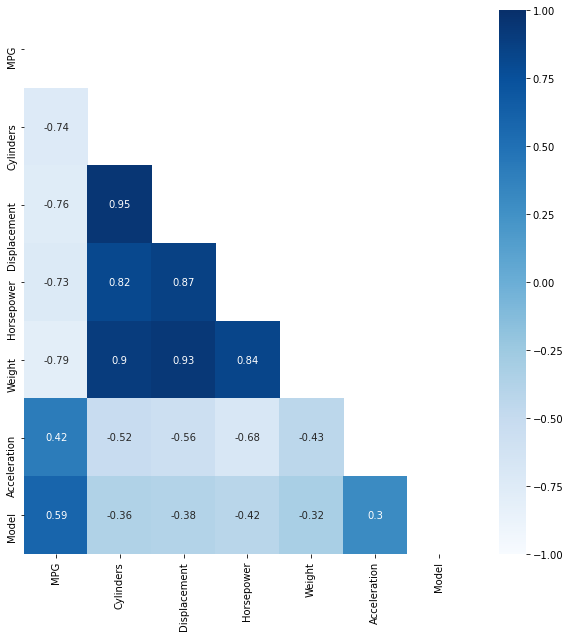

In [15]:
correlation(df1)